In [53]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [67]:
CELL_SIZE = 8
INPUT = 'input/'
OUTPUT = 'output/'

In [93]:
def get_array(image, cell):
    height, width = image.shape
    shape_by_height, shape_by_width = round(height / cell), round(width / cell)
    resized_image = cv2.resize(image, (shape_by_width * cell, shape_by_height * cell))
    brightness_array = np.empty(shape=(shape_by_height, shape_by_width))
    for i in range(shape_by_height):
        for j in range(shape_by_width):
            brightness_array[i][j] = np.mean(resized_image[i * cell:i * cell + cell, j * cell:j * cell + cell])
    print(brightness_array.shape)
    return brightness_array


def get_array_easy_way(image, cell):
    height, width = image.shape
    shape_by_height, shape_by_width = round(height / cell), round(width / cell)
    return cv2.resize(image, (shape_by_width, shape_by_height))
    

def apply_equalize(image):
    return exposure.equalize_hist(image)


def dot_transform(filename):
    image = cv2.imread(INPUT + filename)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    brightness_array = get_array(grayscale_image, CELL_SIZE)
    
    plt.figure(figsize=(40,40))
    plt.imshow(brightness_array, cmap='gray')

(52, 64)
140.25


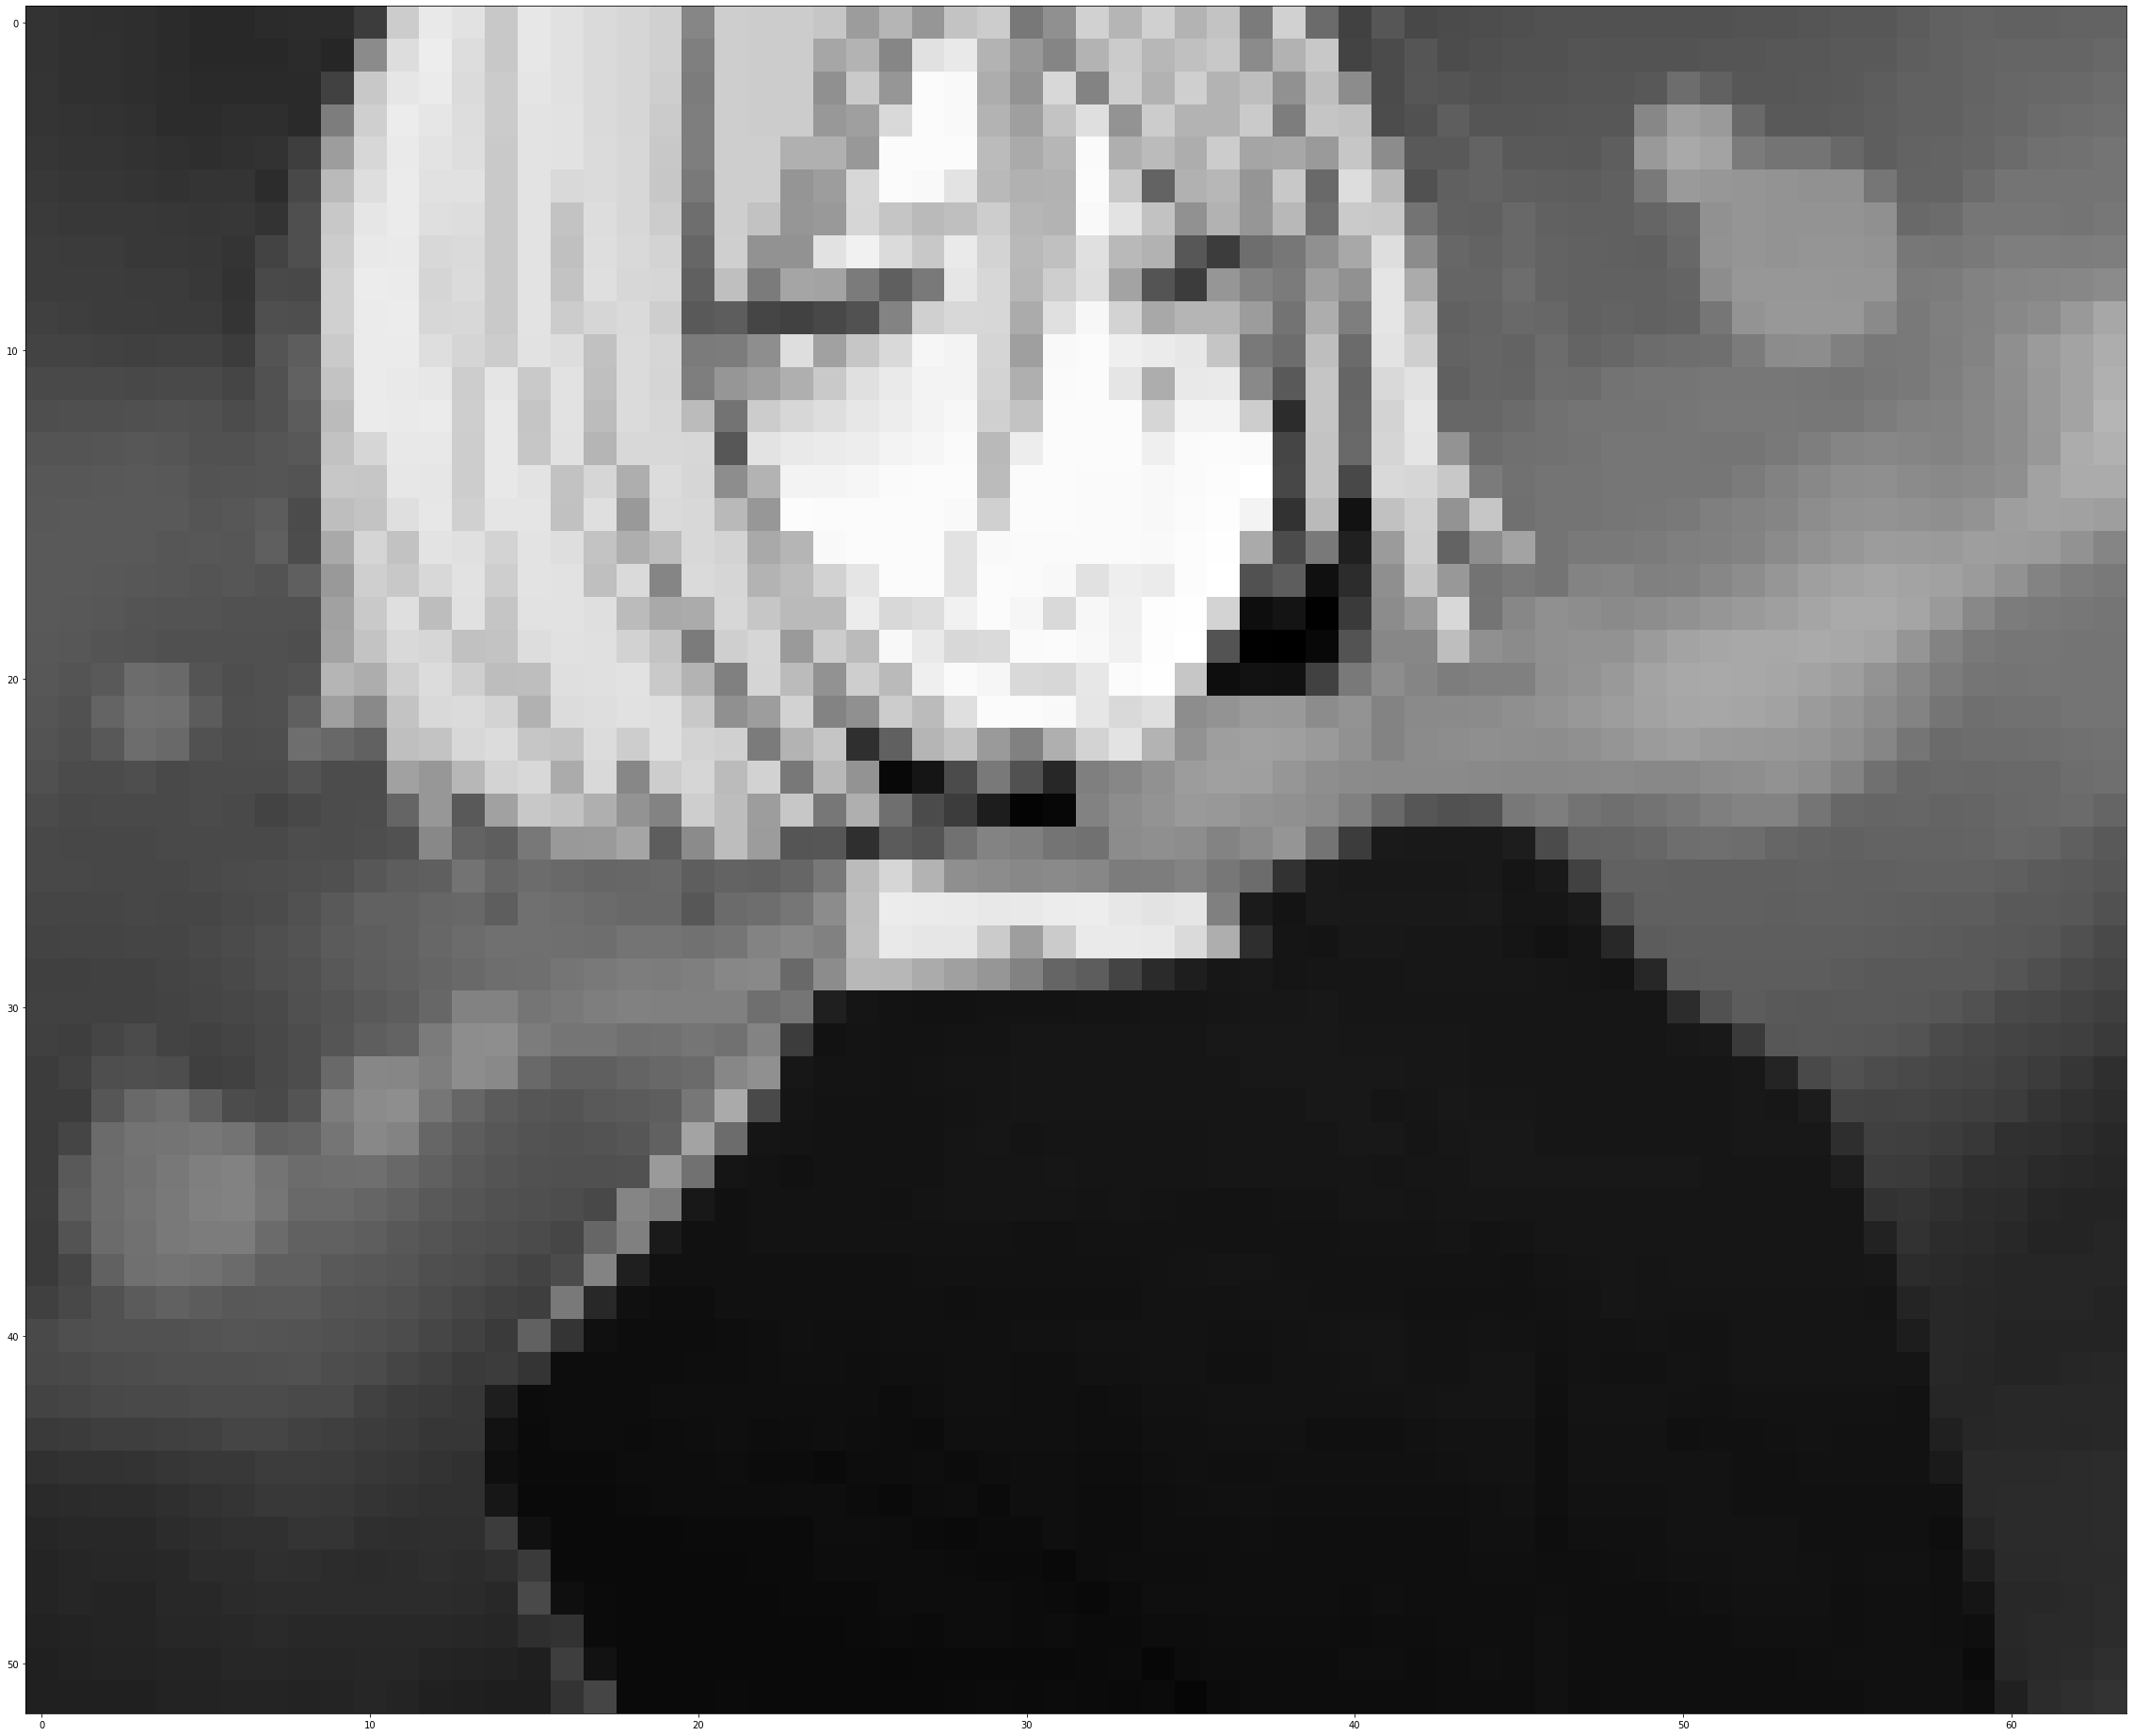

In [94]:
dot_transform('anime.jpg')